In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sc
import scipy as sp
import pandas as pd
import statsmodels.stats.diagnostic as sm
import math

In [2]:
a=1
n=3000
b=100
x = a*np.random.normal(size=n)+b

In [3]:
print(np.mean(x))
print(np.var(x))
print(np.std(x))

100.03498592220723
1.005125206644
1.0025593282414762


In [4]:
def make_segments(X, N, NN=0):
    #Function to split a sequence of numbers (x) into
# N equal segments, with a spacing between them NN (>=0)
#Then the mean and variances of each segment are reported
# Inputs  x : time series data
#              N : length of segment the series x to be split into
#              NN : [Optional, default=0], space between the segments in
#              data points
#
#   Output:  Xm   : Sequence of means of each segment
#           Xvar : Sequence of variance values for for each segment

    M = len(X)
    n = int(np.floor(M / (N + NN)))
    y = np.zeros((N, n))
    for i in range(n):
        j = np.arange(N) + (N + NN) * i
        y[:, i] = X[j]
    Xm = np.mean(y)
    Xvar = np.var(y)
    Xstd = np.std(y)
    return Xm, Xvar,Xstd,y

In [5]:
Xm, Xvar,Xstd,y=make_segments(x,2)
print(Xm, Xvar,Xstd)

100.0349859222072 1.005125206644 1.0025593282414762


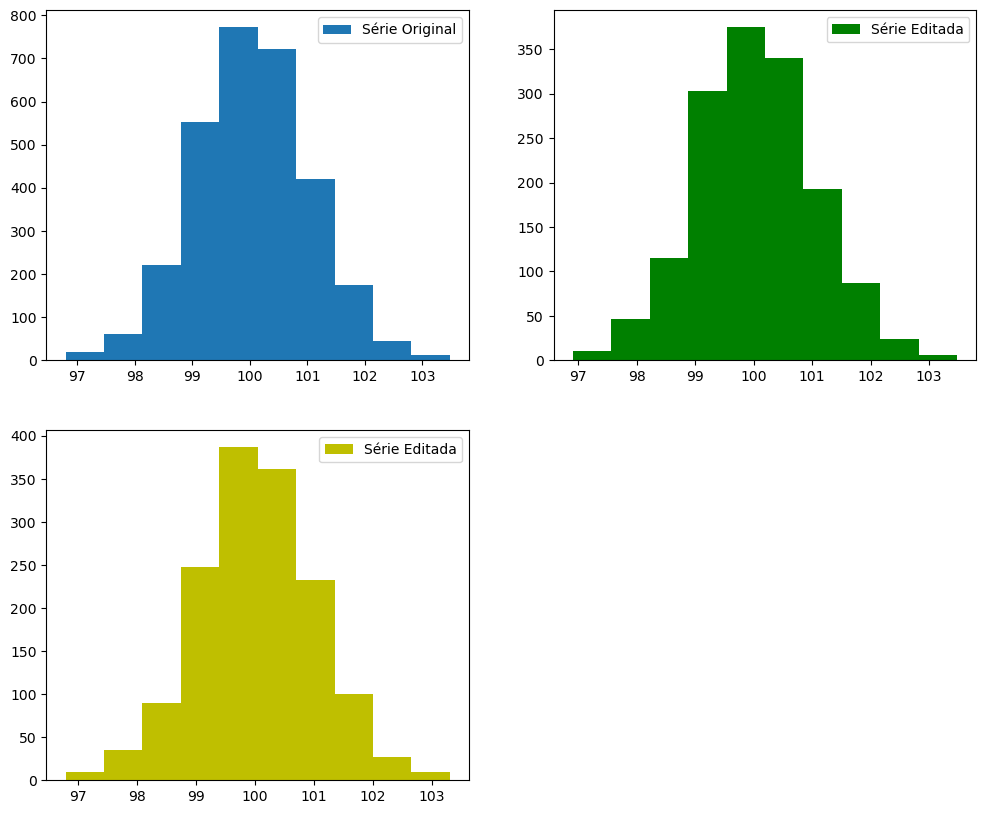

In [9]:
plt.figure(figsize=(12,10))
plt.subplot(221)
plt.hist(x, label='Série Original')
plt.legend()


plt.subplot(222)

plt.hist(y[0,:],label='Série Editada',color='g')
plt.legend()
plt.subplot(223)

plt.hist(y[1,:],label='Série Editada',color='y')
plt.legend()


100.0349859222072 1.005125206644 1.0025593282414762


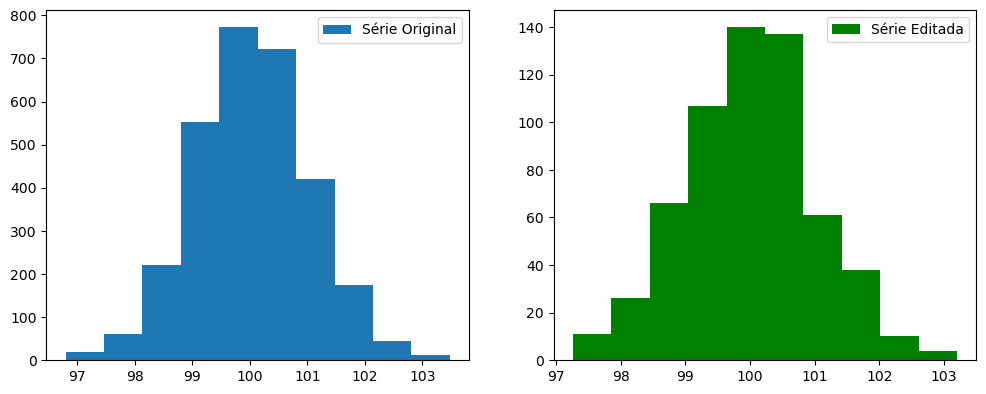

In [11]:
Xm, Xvar,Xstd,y=make_segments(x,5)
plt.figure(figsize=(12,10))
plt.subplot(221)
plt.hist(x, label='Série Original')
plt.legend()


plt.subplot(222)

plt.hist(y[0,:],label='Série Editada',color='g')
plt.legend()
print(Xm, Xvar,Xstd)


100.0349859222072 1.005125206644 1.0025593282414762


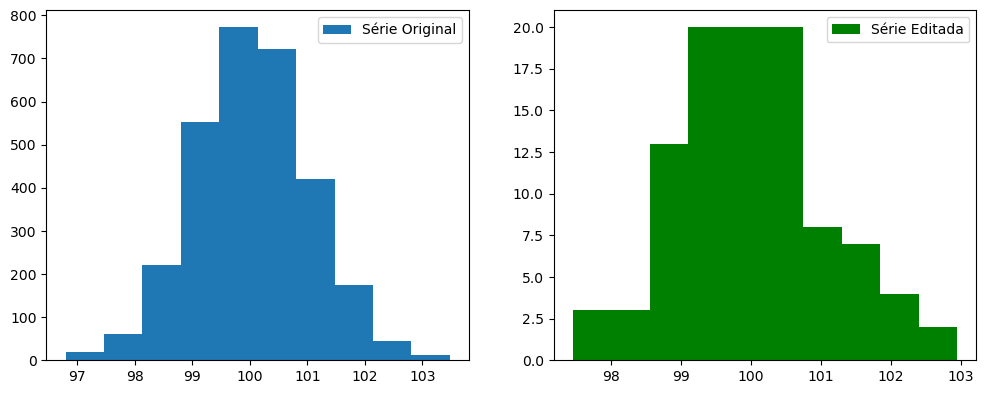

In [12]:
Xm, Xvar,Xstd,y=make_segments(x,30)
plt.figure(figsize=(12,10))
plt.subplot(221)
plt.hist(x, label='Série Original')
plt.legend()


plt.subplot(222)

plt.hist(y[0,:],label='Série Editada',color='g')
plt.legend()
print(Xm, Xvar,Xstd)


100.49747887744894 0.08388681015480874 0.2896321980630067


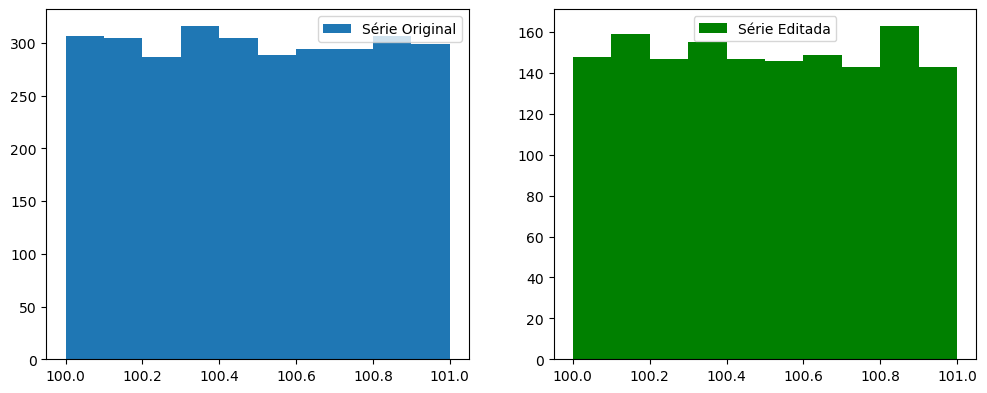

In [16]:
a=1
n=3000
b=100
x = a*np.random.sample(size=n)+b

Xm, Xvar,Xstd,y=make_segments(x,2)
plt.figure(figsize=(12,10))
plt.subplot(221)
plt.hist(x, label='Série Original')
plt.legend()


plt.subplot(222)

plt.hist(y[0,:],label='Série Editada',color='g')
plt.legend()
print(Xm, Xvar,Xstd)


100.49747887744894 0.08388681015480874 0.2896321980630067


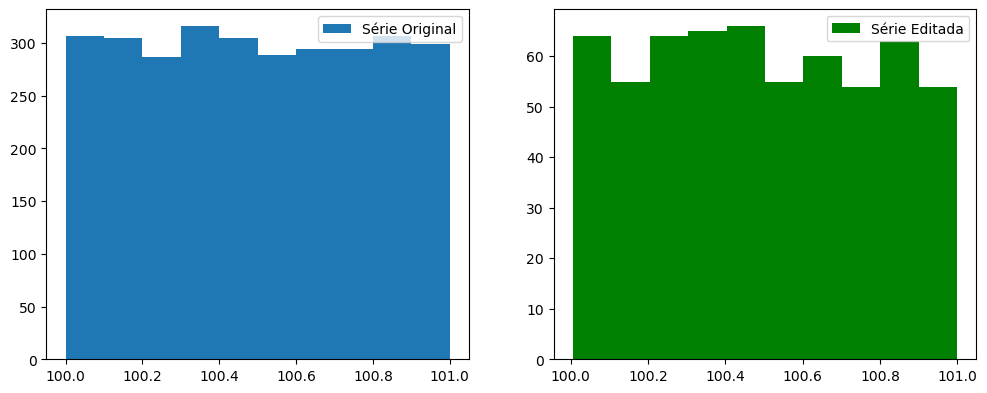

In [17]:

Xm, Xvar,Xstd,y=make_segments(x,5)
plt.figure(figsize=(12,10))
plt.subplot(221)
plt.hist(x, label='Série Original')
plt.legend()


plt.subplot(222)

plt.hist(y[0,:],label='Série Editada',color='g')
plt.legend()
print(Xm, Xvar,Xstd)

100.49747887744894 0.08388681015480874 0.2896321980630067


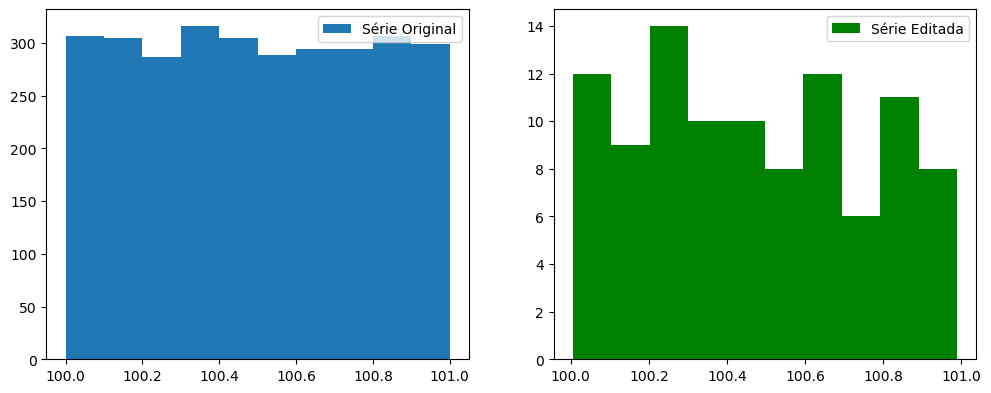

In [18]:

Xm, Xvar,Xstd,y=make_segments(x,30)
plt.figure(figsize=(12,10))
plt.subplot(221)
plt.hist(x, label='Série Original')
plt.legend()


plt.subplot(222)

plt.hist(y[0,:],label='Série Editada',color='g')
plt.legend()
print(Xm, Xvar,Xstd)

0.3165793014502432 0.0658648890737045 0.25664155757340723


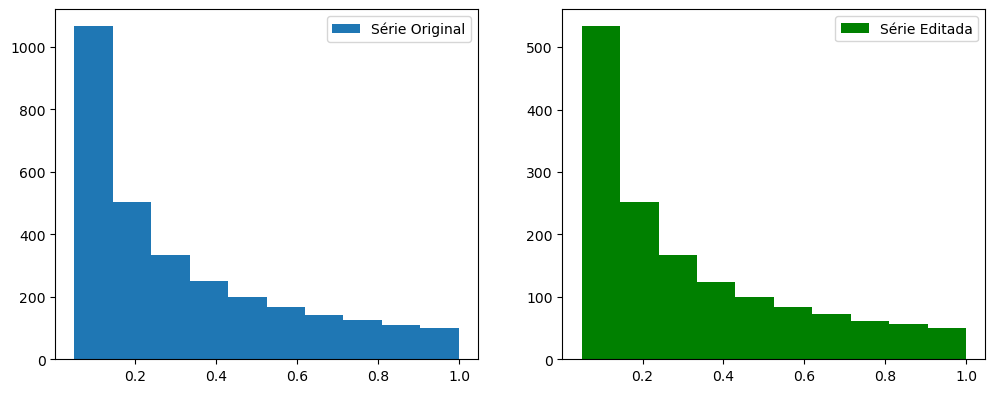

In [19]:
a=1
n=3000
b=100
x = np.exp(-np.arange(1, n+1)/1000)

Xm, Xvar,Xstd,y=make_segments(x,2)
plt.figure(figsize=(12,10))
plt.subplot(221)
plt.hist(x, label='Série Original')
plt.legend()


plt.subplot(222)

plt.hist(y[0,:],label='Série Editada',color='g')
plt.legend()
print(Xm, Xvar,Xstd)


0.3165793014502432 0.06586488907370448 0.2566415575734072


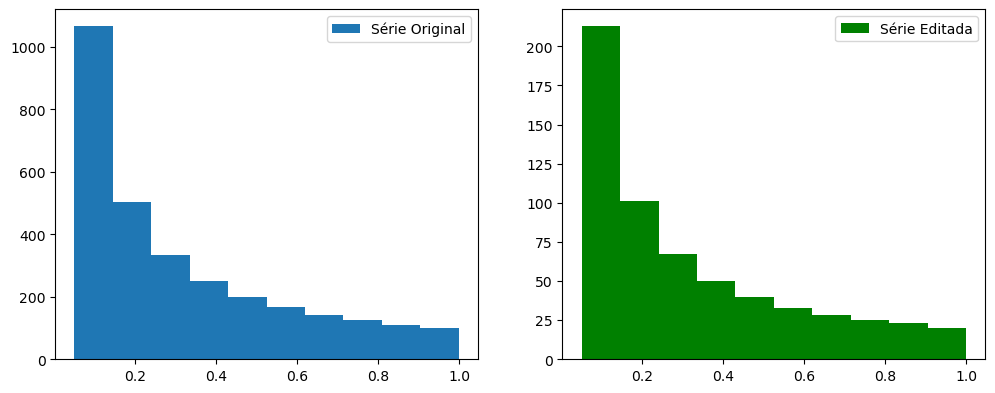

In [20]:
Xm, Xvar,Xstd,y=make_segments(x,5)
plt.figure(figsize=(12,10))
plt.subplot(221)
plt.hist(x, label='Série Original')
plt.legend()


plt.subplot(222)

plt.hist(y[0,:],label='Série Editada',color='g')
plt.legend()
print(Xm, Xvar,Xstd)


0.3165793014502432 0.06586488907370448 0.2566415575734072


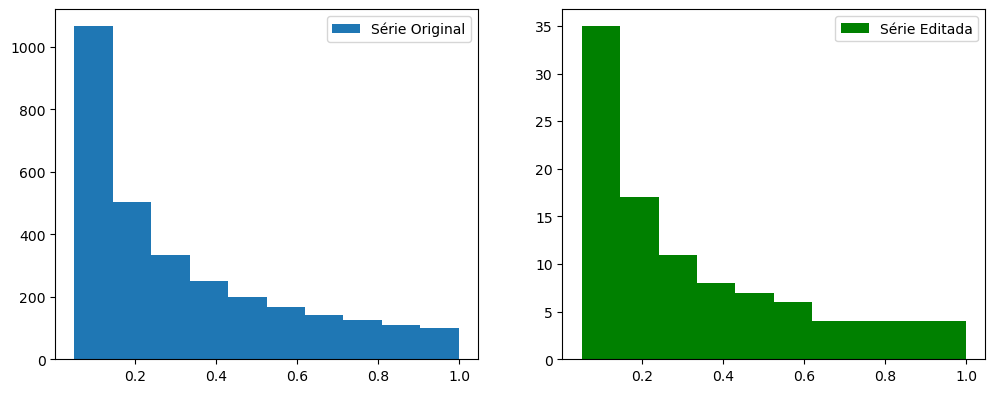

In [21]:
Xm, Xvar,Xstd,y=make_segments(x,30)
plt.figure(figsize=(12,10))
plt.subplot(221)
plt.hist(x, label='Série Original')
plt.legend()


plt.subplot(222)

plt.hist(y[0,:],label='Série Editada',color='g')
plt.legend()
print(Xm, Xvar,Xstd)
